<a href="https://colab.research.google.com/github/AjaySreekumar47/Injury-Prediction-for-Competitive-Runners/blob/main/DataWarehousingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Injury Prediction for Competitive Runners

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("week_approach_maskedID_timeseries.csv")
np.random.seed(0)

In [ ]:
df.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


## Data Exploration & Cleaning

In [ ]:
missing_Values = df.isnull().sum()
missing_Values

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

In [ ]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


We'll begin our data analysis by reducing the dimensionality of the dataset, focusing on dropping attributes determined through empirical analysis. We've excluded any attributes related to subjective feelings of individuals. Our aim is to predict data solely based on quantitative measures of running quality. While factors related to recovery could potentially be valuable, accurately gauging a runner's physical state through survey questions presents considerable challenges.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [ ]:
df = df.drop(['avg training success', 'min training success', 'max training success', 'avg training success.1', 'max training success.1', 'min training success.1'], axis = 1)
df = df.drop(['avg training success.2', 'max training success.2', 'min training success.2', 'avg exertion', 'min exertion', 'max exertion'], axis = 1)
df = df.drop(['avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg exertion.2', 'min exertion.2', 'max exertion.2', 'max km one day'], axis = 1)
df = df.drop(['avg recovery', 'min recovery', 'max recovery', 'avg recovery.1', 'min recovery.1', 'max recovery.1', 'avg recovery.2', 'min recovery.2', 'max recovery.2'], axis = 1)
df = df.drop(['rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 4   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 5   nr. days with interval session                 42798 non-null  float64
 6   total km Z3-4                                  42798 non-null  float64
 7   max km Z3-4 one day                            42798 non-null  float64
 8   total km Z5-T1-T2                              42798 non-null  float64
 9   max km Z5-T1-T2 one day                        427

### Exploratory Data Analysis

In [ ]:
df['Athlete ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [ ]:
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,nr. sessions,nr. rest days,total kms,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,max km Z5-T1-T2 one day,...,nr. days with interval session.2,total km Z3-4.2,max km Z3-4 one day.2,total km Z5-T1-T2.2,max km Z5-T1-T2 one day.2,total hours alternative training.2,nr. strength trainings.2,Athlete ID,injury,Date
0,5.0,2.0,22.2,11.8,1.0,2.0,10.0,10.0,0.6,0.6,...,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,0,0
1,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,0,1
2,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,1.0,3.2,3.2,0.0,0.0,0.0,0.0,0,0,2
3,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,0,3
4,6.0,1.0,39.2,18.9,1.0,3.0,17.2,10.0,0.5,0.5,...,2.0,9.6,6.4,0.0,0.0,0.0,1.0,0,0,4


In [ ]:
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 41 

Columns with na's dropped: 41


In [ ]:
df.count()

nr. sessions                                     42798
nr. rest days                                    42798
total kms                                        42798
total km Z3-Z4-Z5-T1-T2                          42798
nr. tough sessions (effort in Z5, T1 or T2)      42798
nr. days with interval session                   42798
total km Z3-4                                    42798
max km Z3-4 one day                              42798
total km Z5-T1-T2                                42798
max km Z5-T1-T2 one day                          42798
total hours alternative training                 42798
nr. strength trainings                           42798
nr. sessions.1                                   42798
nr. rest days.1                                  42798
total kms.1                                      42798
max km one day.1                                 42798
total km Z3-Z4-Z5-T1-T2.1                        42798
nr. tough sessions (effort in Z5, T1 or T2).1    42798
nr. days w

injury
0    42223
1      575
Name: count, dtype: int64

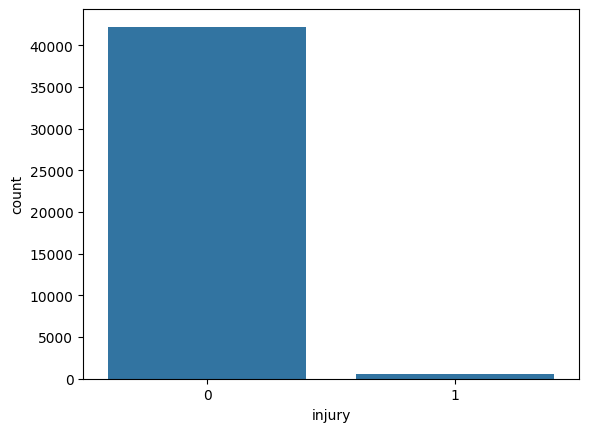

In [ ]:
sns.countplot(x="injury", data=df)
df.loc[:,'injury'].value_counts()

<Axes: >

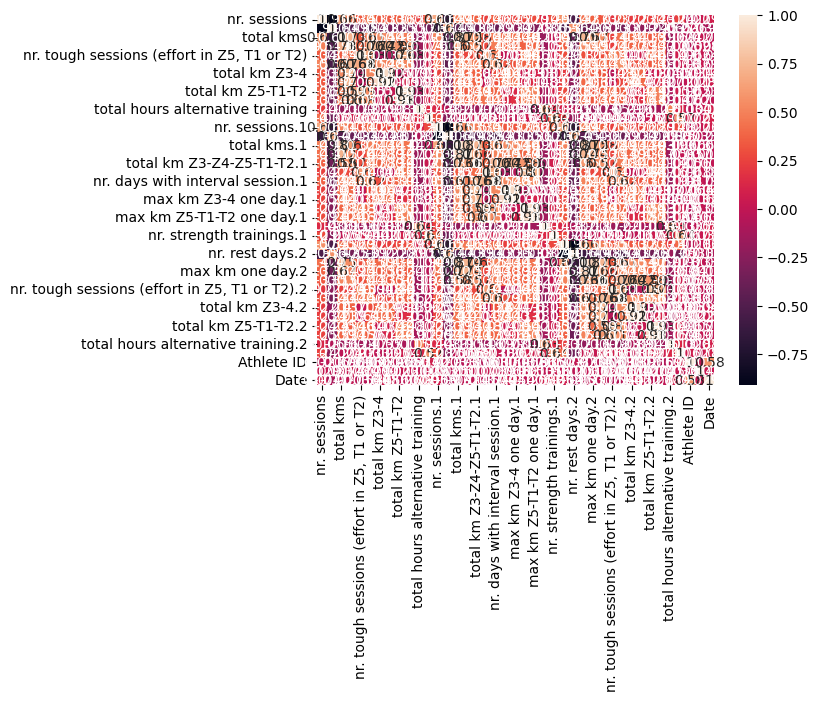

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True)

We have 40 columns to make sense of this dataset and predict if an athlete is injured or not based on the dependent variables.


In [ ]:
athlete_df = df.copy()
athlete_df = athlete_df.set_index('Athlete ID')
athlete_df.head()

,nr. sessions,nr. rest days,total kms,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,max km Z5-T1-T2 one day,...,"nr. tough sessions (effort in Z5, T1 or T2).2",nr. days with interval session.2,total km Z3-4.2,max km Z3-4 one day.2,total km Z5-T1-T2.2,max km Z5-T1-T2 one day.2,total hours alternative training.2,nr. strength trainings.2,injury,Date
Athlete ID,,,,,,,,,,,,,,,,,,,,,
0,5.0,2.0,22.2,11.8,1.0,2.0,10.0,10.0,0.6,0.6,...,0.0,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,0
0,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,0.0,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,1
0,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,0.0,1.0,3.2,3.2,0.0,0.0,0.0,0.0,0,2
0,5.0,2.0,21.6,11.7,1.0,2.0,10.0,10.0,0.5,0.5,...,0.0,1.0,3.2,3.2,0.0,0.0,0.0,1.0,0,3
0,6.0,1.0,39.2,18.9,1.0,3.0,17.2,10.0,0.5,0.5,...,0.0,2.0,9.6,6.4,0.0,0.0,0.0,1.0,0,4


In [ ]:
athlete_df.duplicated().sum()

343

In [ ]:
athlete_df = athlete_df.drop_duplicates()
athlete_df.shape

(42455, 40)

In [ ]:
df1 = athlete_df[athlete_df['injury'] == 0] # Not injured
df2 = athlete_df[athlete_df['injury'] == 1] # Injured

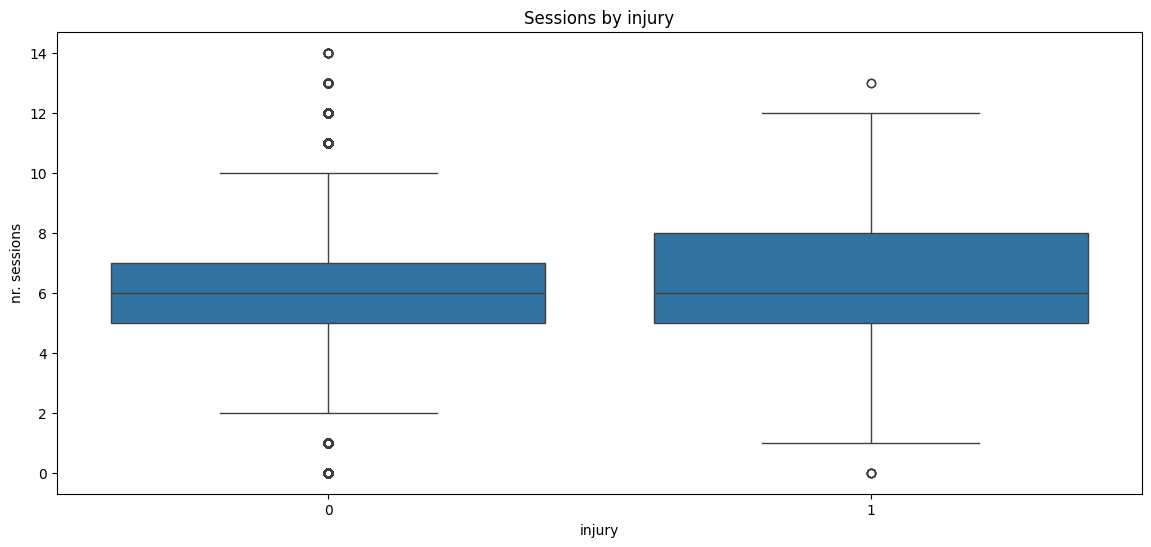

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='injury', y='nr. sessions', data=athlete_df)
plt.title("Sessions by injury");

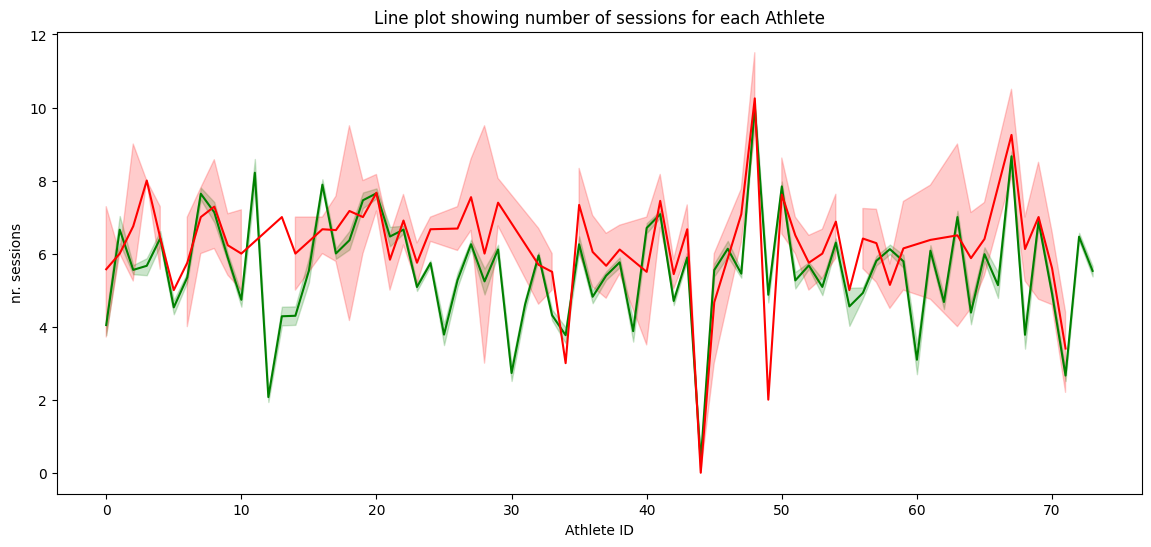

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['nr. sessions'], color='green')
sns.lineplot(data=df2['nr. sessions'], color='red')
plt.title('Line plot showing number of sessions for each Athlete')
plt.show()

In [ ]:
df1.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'nr. sessions.1', 'nr. rest days.1', 'total kms.1', 'max km one day.1',
       'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'nr. sessions.2', 'nr. rest days.2',
       'total kms.2', 'max km one day.2', 'total km Z3-Z4-Z5-T1-T2.2',
       'nr. tough sessions (effort in Z5, T1 or T2).2',
       'nr. days with interval session.2', 'total km Z3-4.2',
       'max km Z3-4 one day.2', 'total

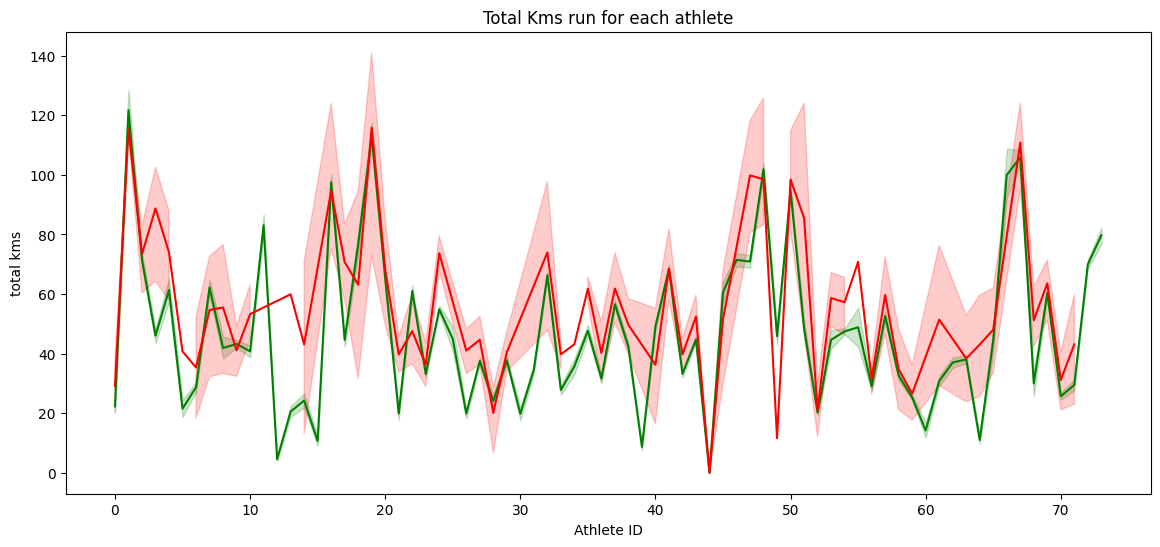

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['total kms'], color='green')
sns.lineplot(data=df2['total kms'], color='red')
plt.title('Total Kms run for each athlete')
plt.show()

In [ ]:
y = athlete_df['injury']
x = athlete_df.drop('injury', axis = 1)

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
x.shape, y.shape

((42455, 39), (42455,))

## K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


Here, we try to take the 'k' value as 2. Since we're attempting to separate the injured athletes from the uninjured ones.

In [ ]:
# train test split
knn = KNeighborsClassifier(n_neighbors = 2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
x_train.shape, y_train.shape

((33964, 39), (33964,))

In [ ]:
x_test.shape, y_test.shape

((8491, 39), (8491,))

In [ ]:
prediction = knn.predict(x_test)
print('With KNN (K=2) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=2) accuracy is:  0.9871628783417736


In [ ]:
print('Classification report for KNN (K=2) is:', classification_report(y_test, prediction))

Classification report for KNN (K=2) is:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8382
           1       0.00      0.00      0.00       109

    accuracy                           0.99      8491
   macro avg       0.49      0.50      0.50      8491
weighted avg       0.97      0.99      0.98      8491



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
prediction = log_reg.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9871628783417736


In [ ]:
print("Classification Report:")
print(classification_report(y_test, prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8382
           1       0.00      0.00      0.00       109

    accuracy                           0.99      8491
   macro avg       0.49      0.50      0.50      8491
weighted avg       0.97      0.99      0.98      8491



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree Classifier

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = decision_tree.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9764456483335296


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8382
           1       0.07      0.07      0.07       109

    accuracy                           0.98      8491
   macro avg       0.53      0.53      0.53      8491
weighted avg       0.98      0.98      0.98      8491



## Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9870451065834412


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8382
           1       0.00      0.00      0.00       109

    accuracy                           0.99      8491
   macro avg       0.49      0.50      0.50      8491
weighted avg       0.97      0.99      0.98      8491



## Support Vector Machines

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9871628783417736


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8382
           1       0.00      0.00      0.00       109

    accuracy                           0.99      8491
   macro avg       0.49      0.50      0.50      8491
weighted avg       0.97      0.99      0.98      8491



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
